### Data Visulization of Titanic Dataset
Begin by loading the titanic dataset into a panda's dataframe. 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#get training data
data = pd.read_csv('train.csv')


data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


From the kaggle website here is the meaning of each column:  

| Variable | Definition                                 | Key                       |
|----------|--------------------------------------------|---------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes           |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex      | Sex                                        |                           |
| Age      | Age in years                               |                           |
| sibsp    | # of siblings / spouses aboard the Titanic |                           |
| parch    | # of parents / children aboard the Titanic |                           |
| ticket   | Ticket number                              |                           |
| fare     | Passenger fare                             |                           |
| cabin    | Cabin number                               |                           |
| embarked | Port of Embarkation                        |C = Cherbourg, Q = Queenstown, S = Southampton |                           |


Next, we will clean up the data a bit. I will remove the name and ticket columns, convert the sex coloumn to either a 1 (male) or 0 (female). I will also put ages and fares into groups. 
Now, lets determine how much of the loaded data is missing. 

In [24]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

First, lets look at the survival versus death rates in the data set.

In [25]:
data.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


We see that people were more likely to die than survive. But what factors allowed the lucky to survive? To determine this, start by plotting the data to show who survived based on age, gender, fare, class and  family statistics. We will just fill in missing values with the median value for now. 

##### Survival based on Age

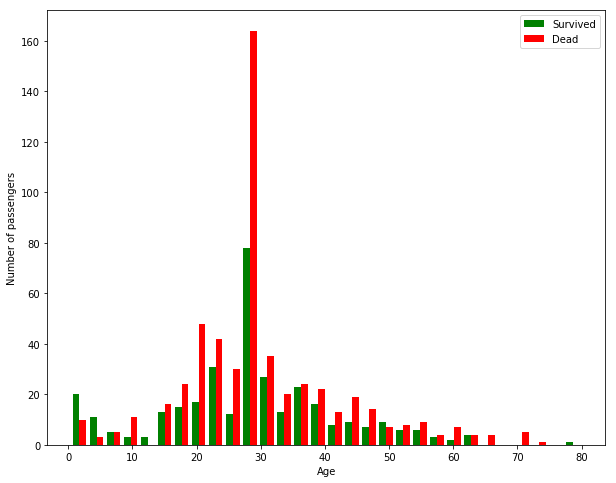

In [26]:
figure = plt.figure(figsize=(10,8))
data['Age'].fillna(data['Age'].median(), inplace=True)
plt.hist([data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']], color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

##### Survival based on Sex

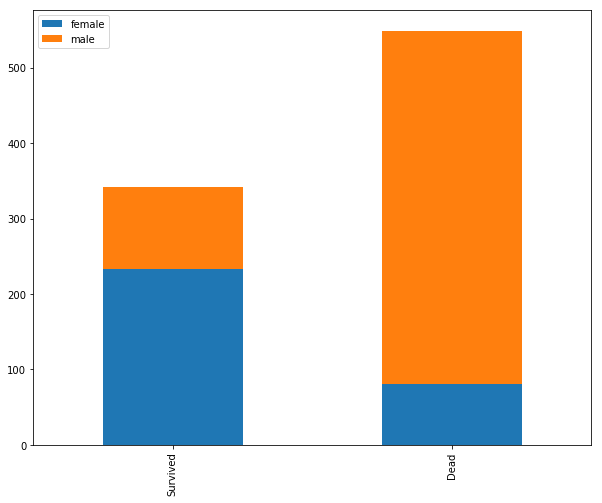

In [27]:
survived = data[data['Survived']==1]['Sex'].value_counts()
dead = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,8))
plt.show()

##### Survival based on fare

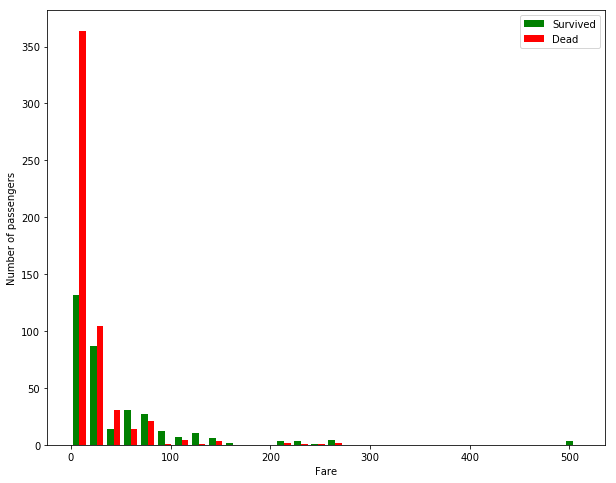

In [28]:
figure = plt.figure(figsize=(10,8))
plt.hist([data[data['Survived']==1]['Fare'], data[data['Survived']==0]['Fare']], color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

#### Survival based on class

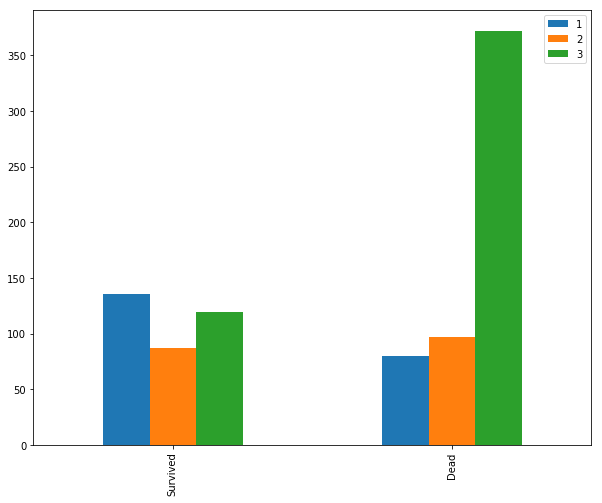

In [29]:
survived = data[data['Survived']==1]['Pclass'].value_counts()
dead = data[data['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar', figsize=(10,8))
plt.show()

#### Survival based on family

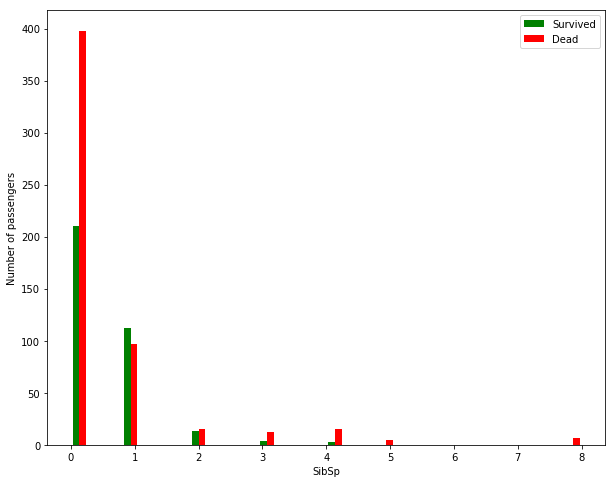

In [30]:
figure = plt.figure(figsize=(10,8))
data['SibSp'].fillna(data['SibSp'].median(), inplace=True)
plt.hist([data[data['Survived']==1]['SibSp'], data[data['Survived']==0]['SibSp']], color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('SibSp')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

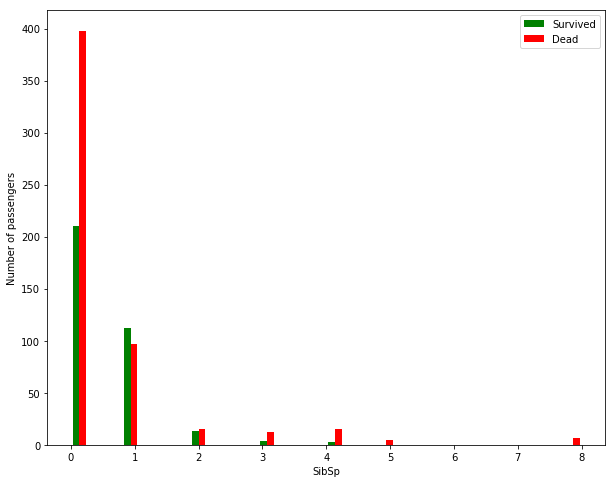

In [31]:
figure = plt.figure(figsize=(10,8))
data['Parch'].fillna(data['Parch'].median(), inplace=True)
plt.hist([data[data['Survived']==1]['SibSp'], data[data['Survived']==0]['SibSp']], color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('SibSp')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

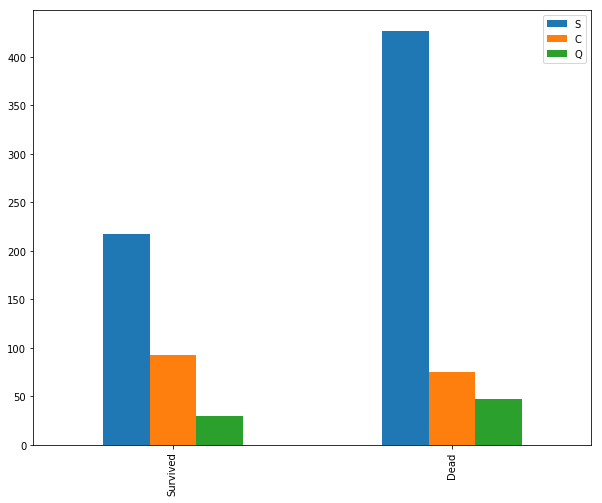

In [32]:
survived = data[data['Survived']==1]['Embarked'].value_counts()
dead = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar', figsize=(10,8))
plt.show()

### Feature Engineering

##### Fill in Missing Values

Let's begin in my filling in the the missing values for the each column. For embarked, since we only have two missing values, fill in the data with the most common embarked location, 'S'. 

In [36]:
data = pd.read_csv('train.csv') #reload data
data['Embarked'].fillna('S', inplace=True)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Since cabin has a lot of missing data and its hard to replicate, we will remove the embarked column all together. While we are at it, lets drop passengerID and Ticket as well. 

In [37]:
data = data.drop(['Cabin','Ticket','PassengerId'], axis=1)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


To fill in the missing values of age, lets look at correlation between the features and age. 

In [38]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [39]:
data.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Since age is most correlated with Pclass, fill in the missing age values based on the corressponding Pclass value. 

In [40]:
data["Age"].fillna(data.groupby("Pclass")["Age"].transform("mean"), inplace=True)

In [41]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

##### Convert category columns to numerical values
Next, map the values of columns sex and embarked to numerical values. 

In [42]:
#convert sex to intergers
data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

#convert embarked to an integer
data['Embarked'] = data['Embarked'].map( {'C': 0, 'Q': 1, 'S': 2} ).astype(int)

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2


##### extract information from name
As has been mentioned in many other kaggle submissions, the passenger have titles such as Mr, Miss, Master etc. Let's extract the title from each name. 

In [43]:
data['Name'] = data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,0,22.0,1,0,7.2500,2
1,1,1,Mrs,1,38.0,1,0,71.2833,0
2,1,3,Miss,1,26.0,0,0,7.9250,2
3,1,1,Mrs,1,35.0,1,0,53.1000,2
4,0,3,Mr,0,35.0,0,0,8.0500,2


In [44]:
data.Name.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [45]:
data.Name = pd.Categorical(data.Name)
data['Name'] = data.Name.cat.codes
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,11,0,22.0,1,0,7.2500,2
1,1,1,12,1,38.0,1,0,71.2833,0
2,1,3,8,1,26.0,0,0,7.9250,2
3,1,1,12,1,35.0,1,0,53.1000,2
4,0,3,11,0,35.0,0,0,8.0500,2


In [47]:
data.corr()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.193635,0.543351,-0.050504,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.029099,-0.131900,-0.403858,0.083081,0.018443,-0.549500,0.162098
Name,-0.193635,0.029099,1.000000,-0.250075,0.290515,-0.200046,-0.126422,-0.077461,0.072621
Sex,0.543351,-0.131900,-0.250075,1.000000,-0.080464,0.114631,0.245489,0.182333,-0.108262
Age,-0.050504,-0.403858,0.290515,-0.080464,1.000000,-0.243452,-0.175799,0.120886,-0.016622
SibSp,-0.035322,0.083081,-0.200046,0.114631,-0.243452,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.126422,0.245489,-0.175799,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.077461,0.182333,0.120886,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.072621,-0.108262,-0.016622,0.068230,0.039798,-0.224719,1.000000


##### Normalize the Data
Normalize the columns that have a lot of varaition (ie age, fare, and name). 

In [49]:
# normalize the data
data['Age'] = (data['Age'] - data['Age'].mean()) / (data['Age'].max() - data['Age'].min())
data['Fare'] = (data['Fare'] - data['Fare'].mean()) / (data['Fare'].max() - data['Fare'].min())
data['Name'] = (data['Name'] - data['Name'].mean()) / (data['Name'].max() - data['Name'].min())
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.047419,0,-0.091642,1,0,-0.048707,2
1,1,1,0.109919,1,0.109413,1,0,0.076277,0
2,1,3,-0.140081,1,-0.041378,0,0,-0.047390,2
3,1,1,0.109919,1,0.071716,1,0,0.040786,2
4,0,3,0.047419,0,0.071716,0,0,-0.047146,2
5,0,3,0.047419,0,-0.052177,0,0,-0.046349,1
6,0,1,0.047419,0,0.310469,0,0,0.038370,2
7,0,3,-0.202581,0,-0.342961,3,1,-0.021723,2
8,1,3,0.109919,1,-0.028812,0,2,-0.041128,2
9,1,2,0.109919,1,-0.192170,1,0,-0.004164,0


In [50]:
##### Save the Data to file
data.to_csv('features.csv')